# Project Based Virtual Internship Data Scientist id/x Partners
* Prediction model

### Importing Libraries

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Legion 5\OneDrive\Documents\Data Scientist IDX Partners\loan_data_2007_2014.csv")
df

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\1310663420.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Legion 5\OneDrive\Documents\Data Scientist IDX Partners\loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


* Pada data diatas terdapat kolom dengan nama "Unnamed" kolom ini biasanya tersimpan mungkin karena adanya indexs yang terekspor sebagai kolom
* untuk itu kita akan berusaha memperbaiki agar datasetnya menjadi lebih baik lagi
* dikarenakan kolom "Unnamed" tidak diperlukan untuk pengerjaan project ini maka:
* salah satu caranya kita akan menghapus kolom "Unnamed" itu


In [3]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

In [4]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


### Data Understanding

In [5]:
df.shape

(466285, 74)

* Dari hasil tersebut dataset terdiri atas:
1. terdapat jumlah row (baris) data sebanyak 466285 baris
2. terdapat jumlah columns (kolom) data sebanyak 74 kolom

* Cek setiap kolom atribut data

In [6]:
# Tampilkan informasi tentang dataset
print("\nInformasi dari setiap atribut yang terdapat pada dataset")
df.info()


Informasi dari setiap atribut yang terdapat pada dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  

* eksplorasi awal terhadap distribusi variabel, statistik deskriptif dan pola umum pada data

In [7]:
df.describe(include="all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,466285,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,31686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


### Exploratory Data Analysis

In [197]:
# Cek Missing Value
missing_values = df.isnull().sum()
missing_values

term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_de

In [9]:
print("kolom yang memiliki missing values")
# menmapilkan kolom missing values yang lebih besar dari 0
missing_values[missing_values > 0]

kolom yang memiliki missing values


emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m  

In [10]:
df.duplicated().sum()

0

* Ternyata pada dataset ini tidak memiliki duplikat
* Sebelum kita menangani missing values kita harus tau dulu apa aja sih mengenai kolom-kolom dalam dataset tersebut:
* Kita ingin memprediksi sebuah pinjaman yang beresiko dan tidak beresiko
* seperti yang kita lihat bahwa setiap pinjaman menampilkan ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"] ini sedikit ambiguitas
* kita akan mengatasi missing values

In [11]:
def missing_values_persen(df: pd.DataFrame):
  # cek apakah ada missing values
  cek_missing = df.isnull().any().sum() > 0

  if not cek_missing:
    print("\nTidak ada Missing values")
    return None

  # cek jumlah kolom yang missing values
  missing_kolom = df.columns[df.isnull().any()]

  # variabel
  n = len(df)

  missing_persen = ((df[missing_kolom].isnull().sum() / n * 100).round(2).sort_values())

  missing_df = pd.DataFrame({
      "Columns" : missing_persen.index,
      "Persen" : missing_persen.values
  })

  #bikin visual
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(data=missing_df, x="Persen", y="Columns", ax=ax, palette=sns.color_palette("Set3")) # corrected y-axis label and removed color_palette
  ax.set_title("Missing Values Percentage")

  return missing_persen

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\4018636855.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, x="Persen", y="Columns", ax=ax, palette=sns.color_palette("Set3")) # corrected y-axis label and removed color_palette
C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\4018636855.py:24: UserWarning: 
The palette list has fewer values (12) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=missing_df, x="Persen", y="Columns", ax=ax, palette=sns.color_palette("Set3")) # corrected y-axis label and removed color_palette


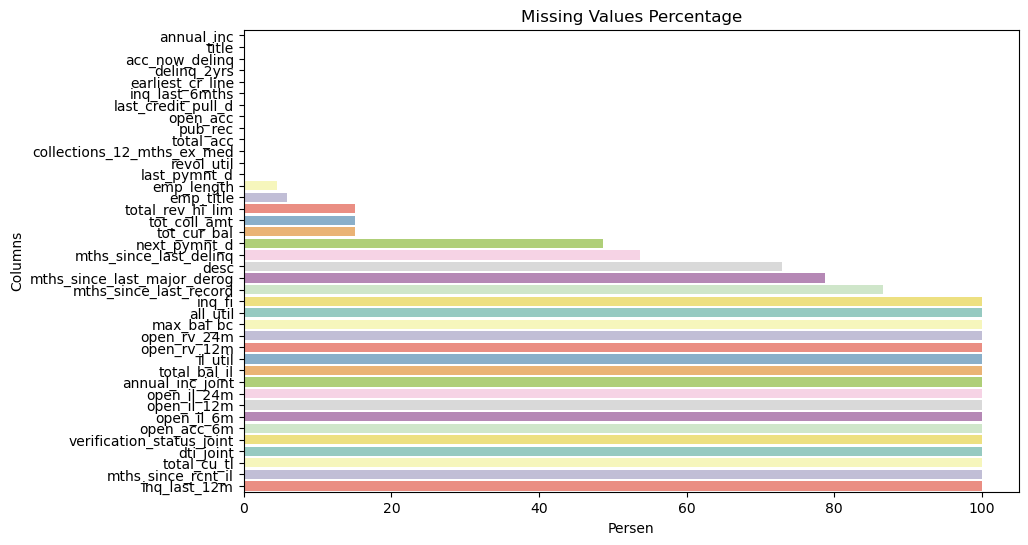

In [12]:
missing_persen = missing_values_persen(df)

In [13]:
missing_persen

annual_inc                       0.00
title                            0.00
acc_now_delinq                   0.01
delinq_2yrs                      0.01
earliest_cr_line                 0.01
inq_last_6mths                   0.01
last_credit_pull_d               0.01
open_acc                         0.01
pub_rec                          0.01
total_acc                        0.01
collections_12_mths_ex_med       0.03
revol_util                       0.07
last_pymnt_d                     0.08
emp_length                       4.51
emp_title                        5.92
total_rev_hi_lim                15.07
tot_coll_amt                    15.07
tot_cur_bal                     15.07
next_pymnt_d                    48.73
mths_since_last_delinq          53.69
desc                            72.98
mths_since_last_major_derog     78.77
mths_since_last_record          86.57
inq_fi                         100.00
all_util                       100.00
max_bal_bc                     100.00
open_rv_24m 

In [14]:
# hapus kolom dengan jumlah missing values yang 100%
hapus_kolom = missing_persen[missing_persen == 100].index

In [15]:
df = df.drop(hapus_kolom, axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [16]:
df.shape

(466285, 57)

In [17]:
# hapus kolom dengan jumlah missing values yang 15%
hapus_kolom_baru = missing_persen[(missing_persen > 16.0) & (missing_persen <= 87.0)].index
hapus_kolom_baru

Index(['next_pymnt_d', 'mths_since_last_delinq', 'desc',
       'mths_since_last_major_derog', 'mths_since_last_record'],
      dtype='object')

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\4018636855.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, x="Persen", y="Columns", ax=ax, palette=sns.color_palette("Set3")) # corrected y-axis label and removed color_palette
C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\4018636855.py:24: UserWarning: 
The palette list has fewer values (12) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=missing_df, x="Persen", y="Columns", ax=ax, palette=sns.color_palette("Set3")) # corrected y-axis label and removed color_palette


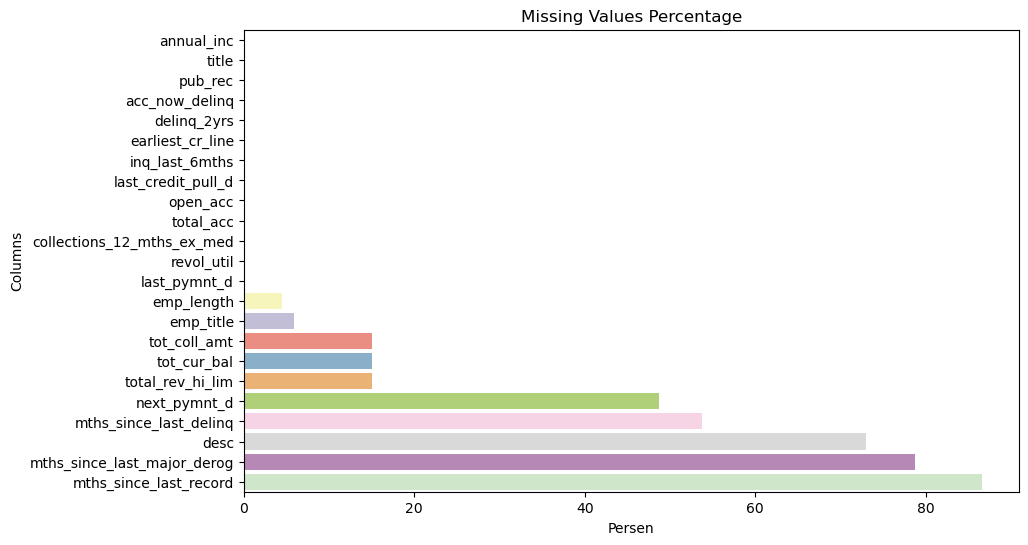

In [18]:
missing_persen = missing_values_persen(df)

In [19]:
def mengatasi_missing_values(df: pd.DataFrame, kolom: str):
  # hapus kolom yang terdapat value NAN
  non_missing_values = df[kolom].dropna()
  #bikin filter untuk kolom missing values
  sample_random = non_missing_values.sample(
      df[kolom].isna().sum(), replace=True, random_state=42
  )
  # ganti nilai nan dengan sample acak
  df.loc[df[kolom].isna(), kolom] = sample_random.values

  return df

In [20]:
for col in missing_persen.index:
  mengatasi_missing_values(df, col)

In [21]:
# cek missing values
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc  

In [22]:
# menghapus kolom kategorikal yang nilai unique > 35 (noise)
for col in df.select_dtypes("object").columns:
  # cek kalau data unique besar dari 35
  if df[col].nunique() > 35:
    print("Hapus column:  ", col)
    df = df.drop(col, axis=1)

Hapus column:   emp_title
Hapus column:   issue_d
Hapus column:   url
Hapus column:   desc
Hapus column:   title
Hapus column:   zip_code
Hapus column:   addr_state
Hapus column:   earliest_cr_line
Hapus column:   last_pymnt_d
Hapus column:   next_pymnt_d
Hapus column:   last_credit_pull_d


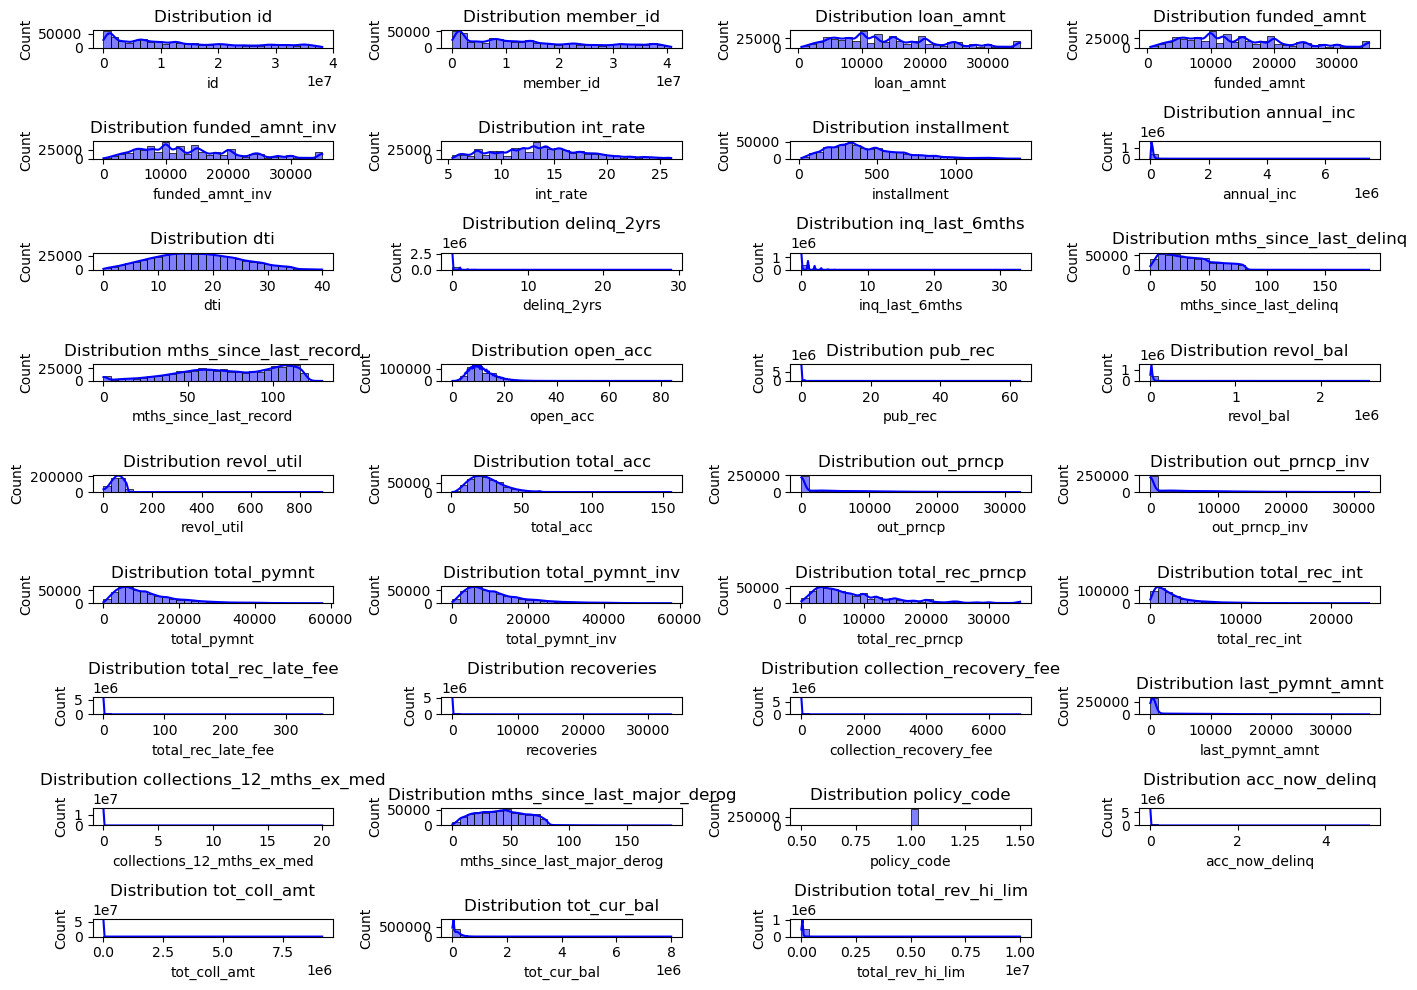

In [23]:
# distribusi fitur numeric
num_features = df.select_dtypes(include=[np.number]) #select_dtypes untuk semua fitur dengan tipe data numeric
plt.figure(figsize=(14, 10))
# Hitung jumlah baris dan kolom untuk subplot
num_cols = 4  # Jumlah kolom di grid subplot
num_rows = int(np.ceil(len(num_features.columns) / num_cols))  # Jumlah baris, dibulatkan ke atas

for i, column in enumerate(num_features.columns, 1): # fungsi enumerate untuk iterable(looping)
  plt.subplot(num_rows, num_cols, i) # 3 baris, 4 kolom dengan i= indexnya
  sns.histplot(df[column], bins=30, kde=True, color="blue")
  plt.title(f"Distribution {column}")
plt.tight_layout()
plt.show()

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


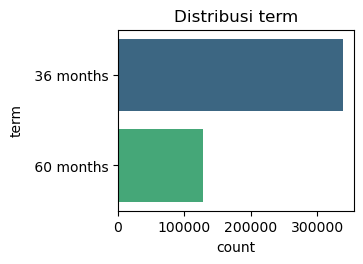

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


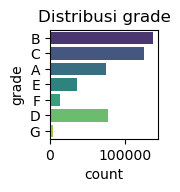

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


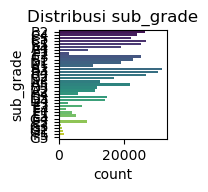

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


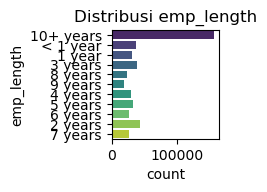

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


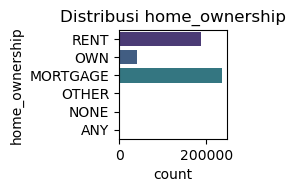

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


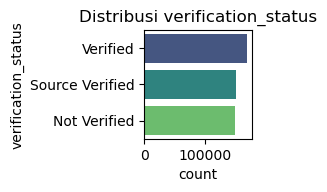

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


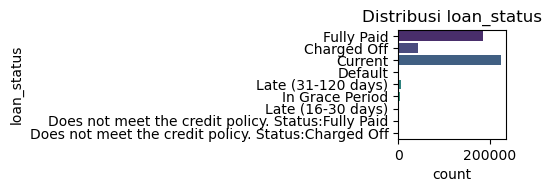

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


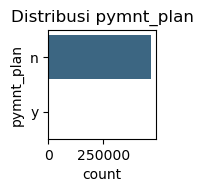

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


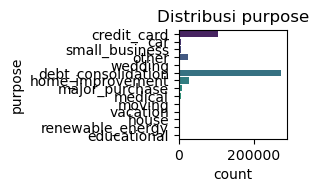

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


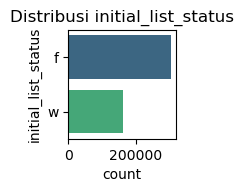

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3098684553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis


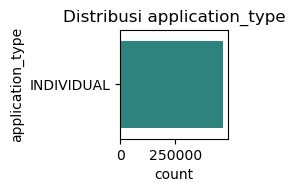

In [24]:
#distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
num_cols = 4  # Jumlah kolom di grid subplot
num_rows = int(np.ceil(len(cat_features.columns) / num_cols))  # Jumlah baris, dibulatkan ke atas

for i, column in enumerate(cat_features.columns, 1): #fungsi enumerate untuk iterable(looping)
  plt.subplot(num_rows, num_cols, i) # 2 baris dengan 4 kolom
  #sns.countplot(y=data[column], palette="varidis")
  sns.countplot(y=df[column], palette='viridis') #sumbu y dan warna viridis
  plt.title(f"Distribusi {column}")
  plt.tight_layout # merapikan tampilan visual
  plt.show()

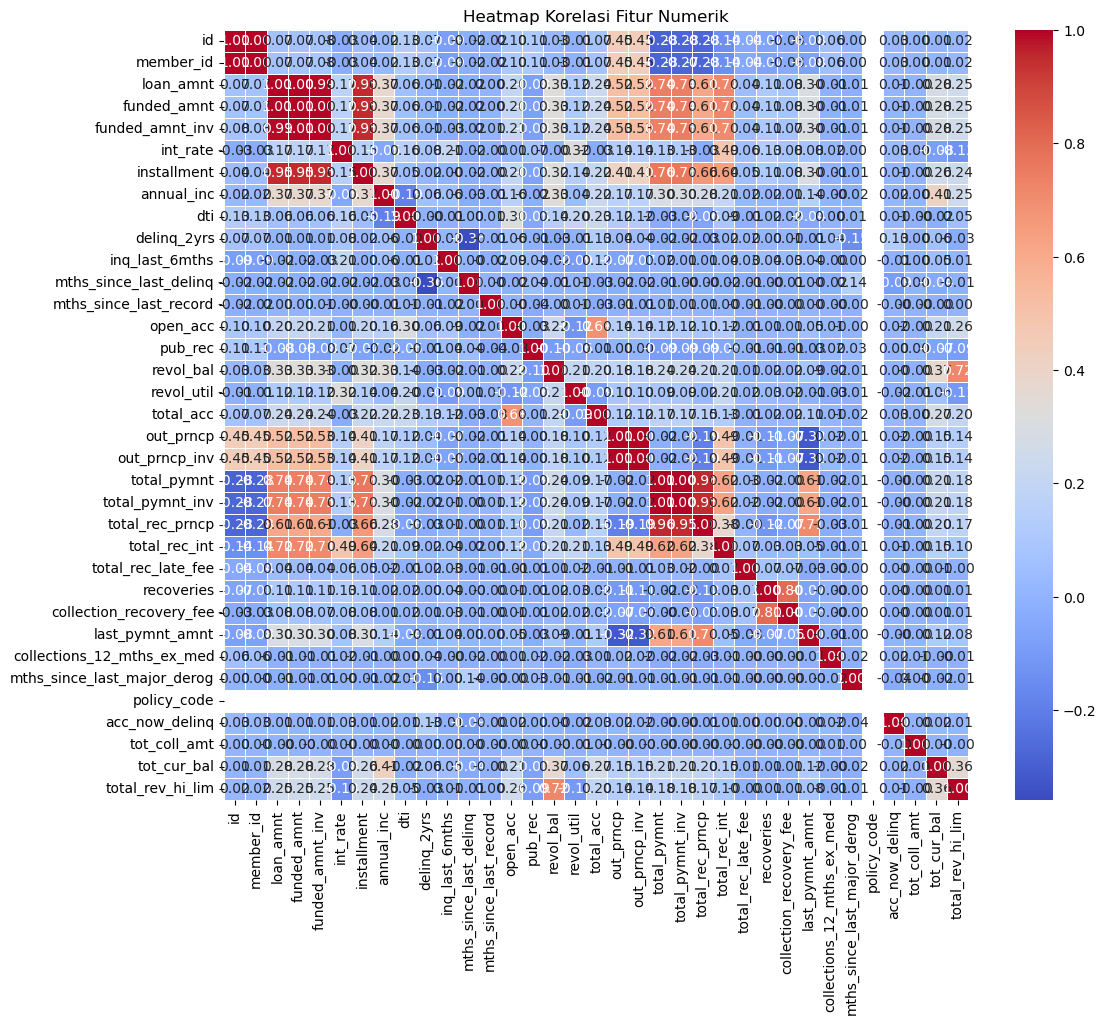

In [25]:
# heatmap korelation untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr() # korelation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # heatmap korelation
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()  # menampilkan visualisasi

In [26]:
for col in ["home_ownership", "loan_status", "purpose", "pymnt_plan"]:
  display( # menampilkan label secara langsung
      df.groupby(col)
      .agg({"id" : "count"})
      .sort_values(by="id", ascending=False)
      .reset_index() # reset index
  )

,home_ownership,id
0,MORTGAGE,235875
1,RENT,188473
2,OWN,41704
3,OTHER,182
4,NONE,50
5,ANY,1


,loan_status,id
0,Current,224226
1,Fully Paid,184739
2,Charged Off,42475
3,Late (31-120 days),6900
4,In Grace Period,3146
5,Does not meet the credit policy. Status:Fully ...,1988
6,Late (16-30 days),1218
7,Default,832
8,Does not meet the credit policy. Status:Charge...,761


,purpose,id
0,debt_consolidation,274195
1,credit_card,104157
2,home_improvement,26537
3,other,23690
4,major_purchase,9828
5,small_business,7013
6,car,5397
7,medical,4602
8,moving,2994
9,vacation,2487


,pymnt_plan,id
0,n,466276
1,y,9


* Berdasarkan plot distribusi nilai kolom, ada beberapa kolom yang hanya memiliki satu nilai dan beberapa kolom yang memiliki nilai dominan, oleh karena itu kami menghapus kolom-kolom tersebut karena tidak terlalu berguna.

In [27]:
# hapus kolom
df = df.drop(["id", "member_id", "pymnt_plan", "application_type", "policy_code"], axis=1)

In [28]:
df.shape

(466285, 41)

In [29]:
df.loc[:, "acc_now_delinq"] = df.loc[:, "acc_now_delinq"].astype(int).astype(str)

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\3932730314.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, "acc_now_delinq"] = df.loc[:, "acc_now_delinq"].astype(int).astype(str)


In [30]:
df.loc[:, "home_ownership"] = df["home_ownership"].apply(
    lambda x: "OTHER" if x in ["ANY", "NONE"] else x
)

In [31]:
numeric_column = df.select_dtypes("number").columns
df_copy = df[numeric_column]
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti nilai-nilai outlier dengan nilai Q1 atau Q3
print(f"Before removing outlier {df.shape}")
print(f"After removing outlier {df_copy[~((df_copy < lower_bound) | (df_copy > upper_bound)).any(axis=1)].shape}")
print(f"Total data removed {df.shape[0] - df_copy[~((df_copy < lower_bound) | (df_copy > upper_bound)).any(axis=1)].shape[0]} rows")

Before removing outlier (466285, 41)
After removing outlier (161133, 31)
Total data removed 305152 rows


* Selanjutnya kita akan memilih label berdasarkan fitur loan_status

* - Hutang Baik: Lunas, Tidak memenuhi kebijakan kredit. Status: Lunas, Lancar, Dalam Masa Tenggang

* - Kredit Macet: Dibebankan, Tidak memenuhi kebijakan kredit. Status: Dibebankan, Terlambat (16-30 hari), Terlambat (31-120 hari), Default

In [ ]:
df["loan_status"]

In [33]:
# bikin sebuah list
good = [
    "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid",
    "Current",
    "In Grace Period"]
bad = [
    "Charged Off",
    "Late (31-120 days)",
    "Late (16-30 days)",
    "Default",
    "Does not meet the credit policy. Status:Charged Off"]

In [34]:
df.loc[:, "loan_status"] = df["loan_status"].apply(
    lambda x: "GOOD" if x in good else "BAD"
)

In [35]:
df["loan_status"]

0         GOOD
1          BAD
2         GOOD
3         GOOD
4         GOOD
          ... 
466280    GOOD
466281     BAD
466282    GOOD
466283    GOOD
466284    GOOD
Name: loan_status, Length: 466285, dtype: object

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_14640\2919533031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="viridis")


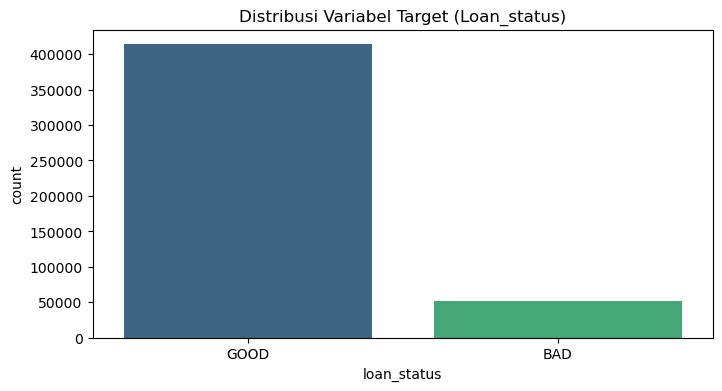

In [36]:
#visualisasi distribusi kolom loan_status
plt.figure(figsize=(8, 4))
sns.countplot(x="loan_status", data=df, palette="viridis")
plt.title("Distribusi Variabel Target (Loan_status)")
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   466285 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466285 non-null  float64
 11  verification_status          466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

In [38]:
select_column = df.select_dtypes("object").columns.drop(["sub_grade", "loan_status"])

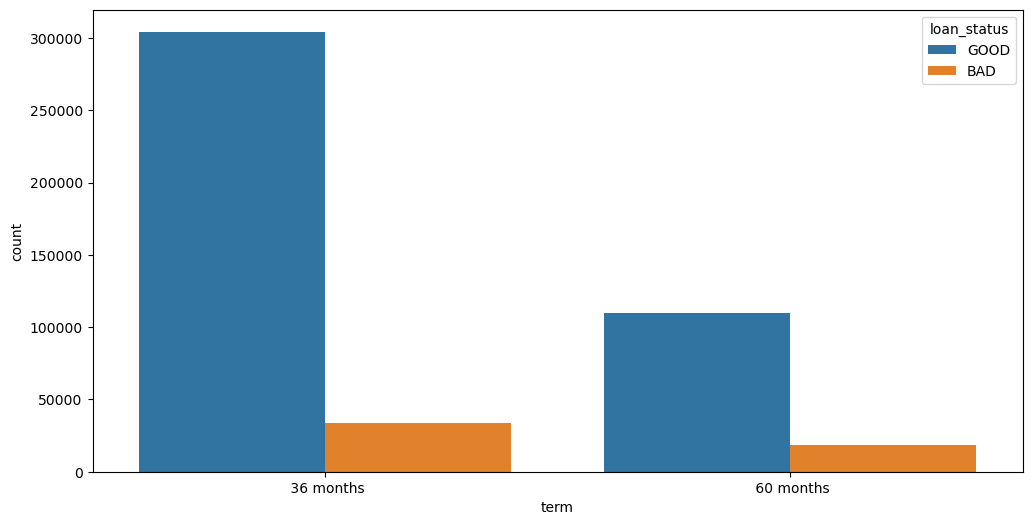

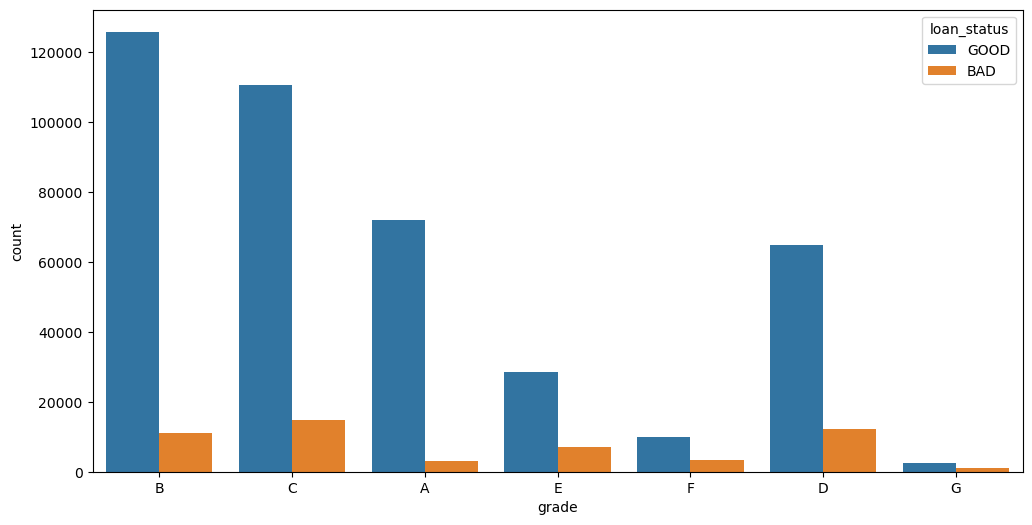

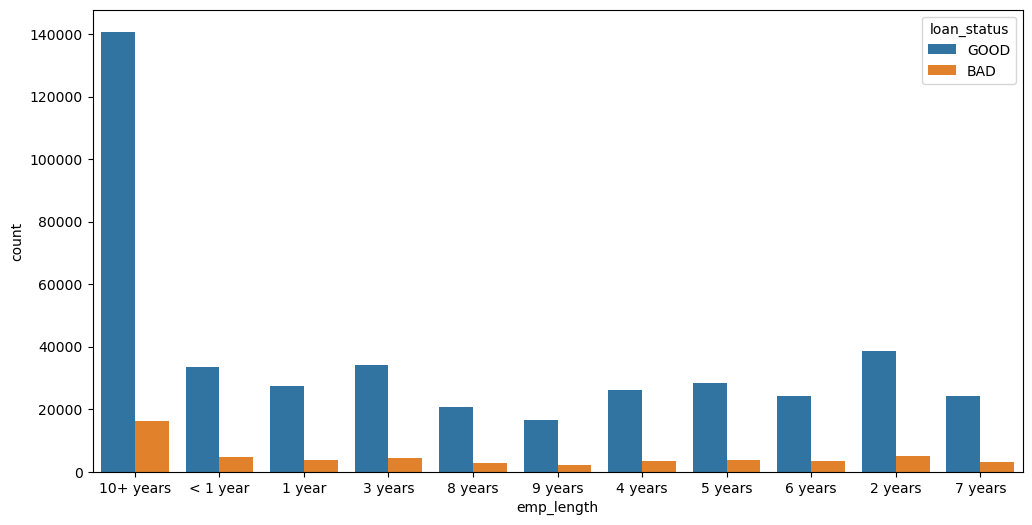

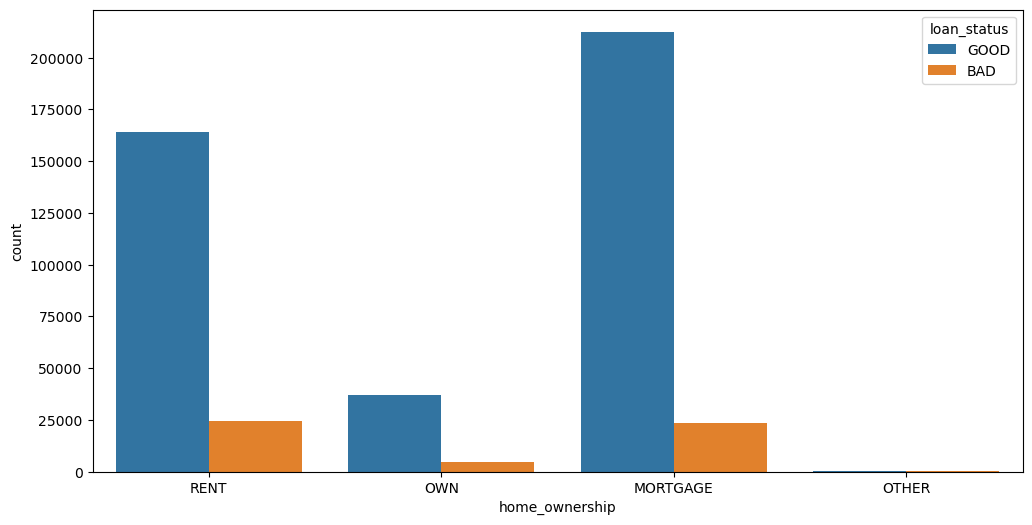

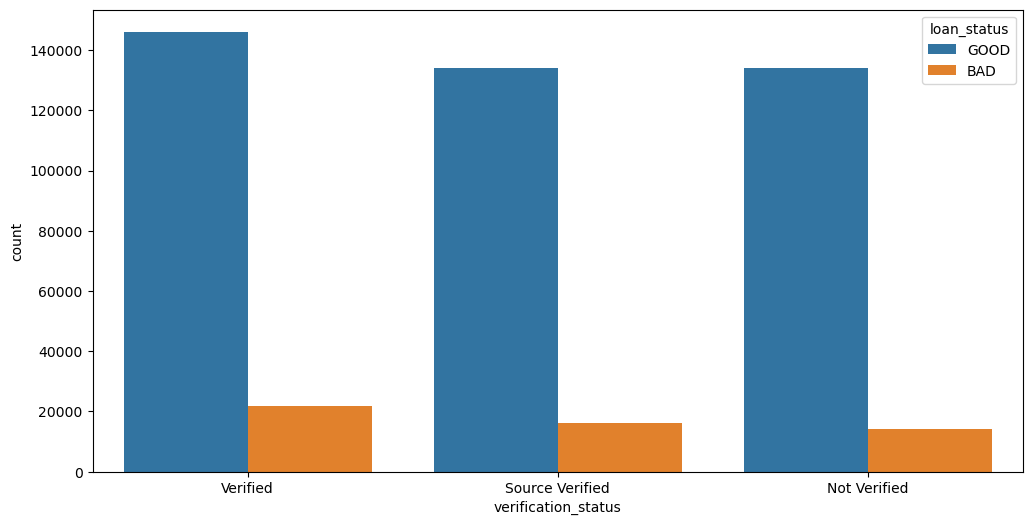

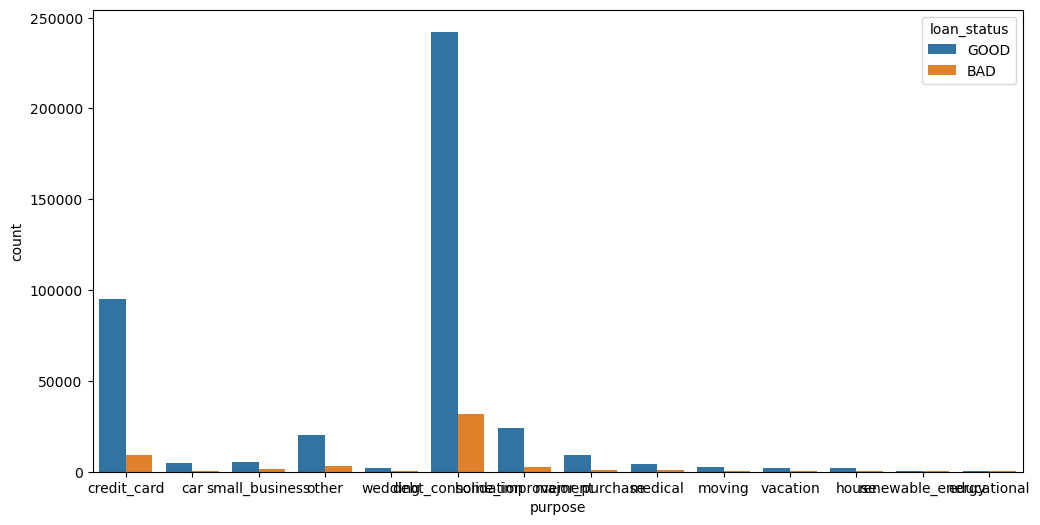

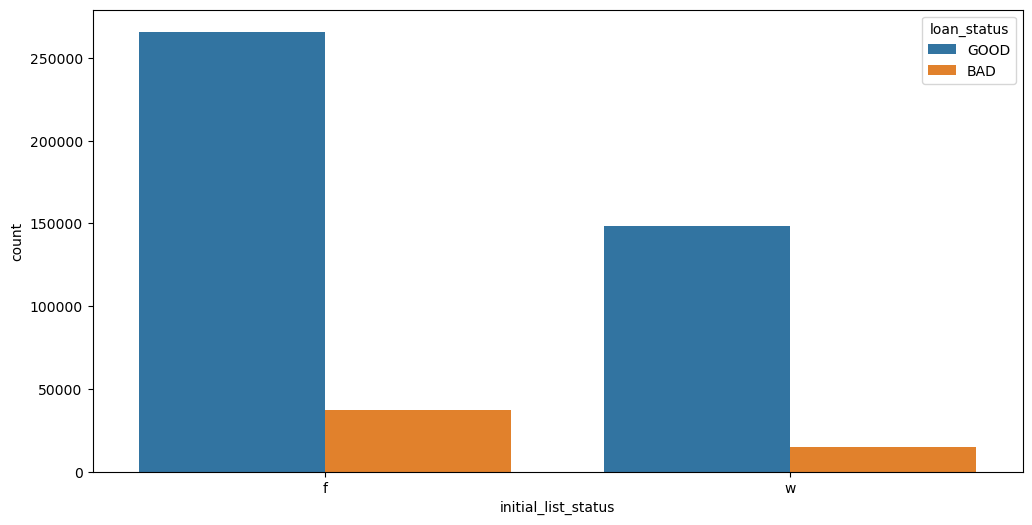

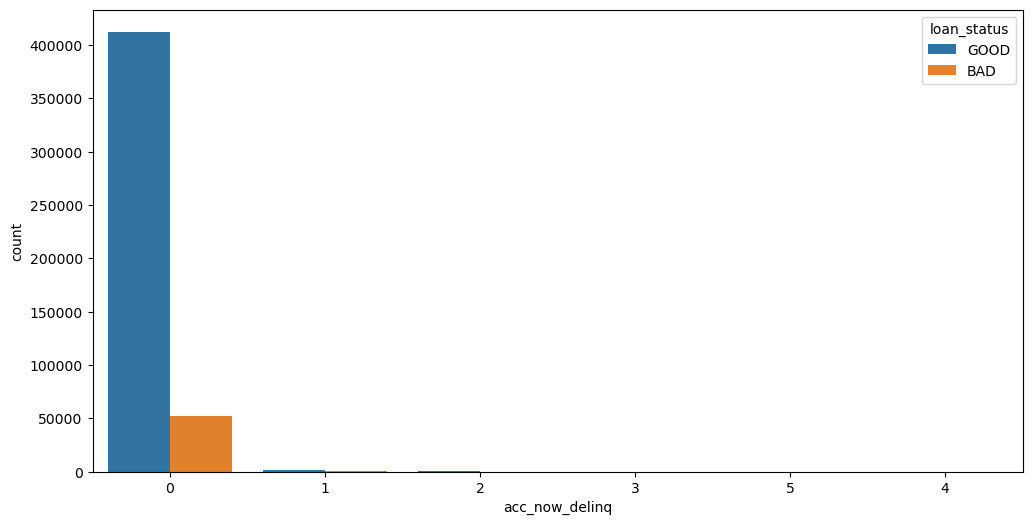

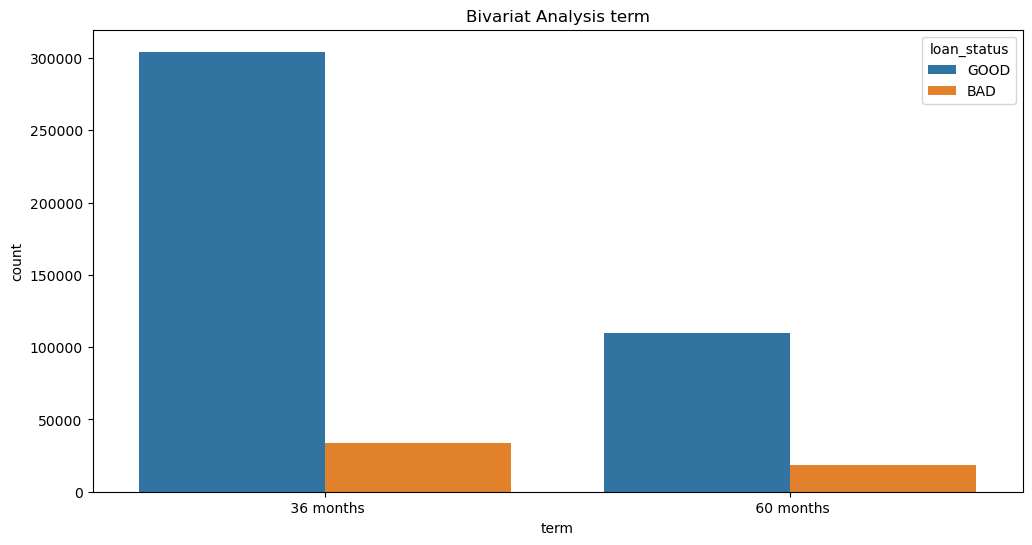

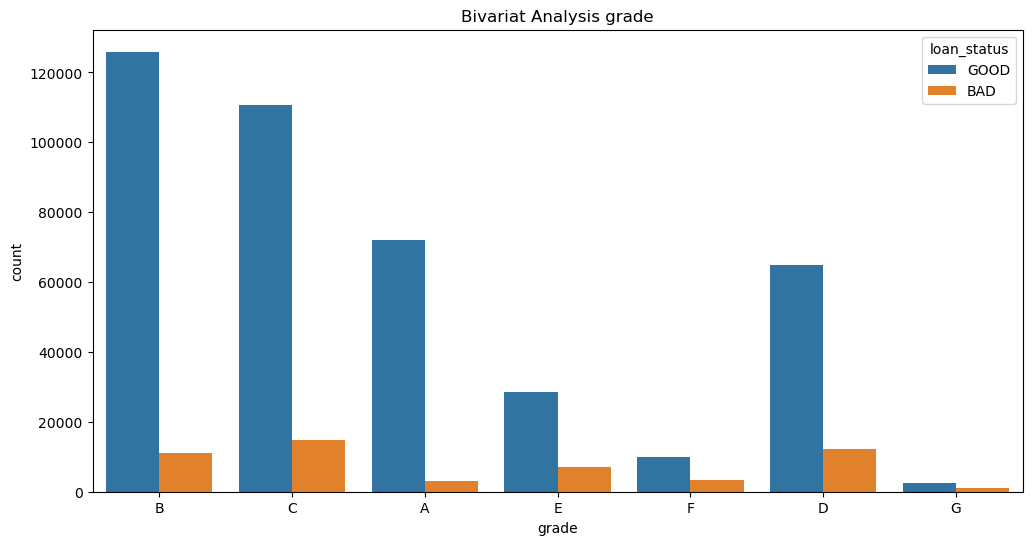

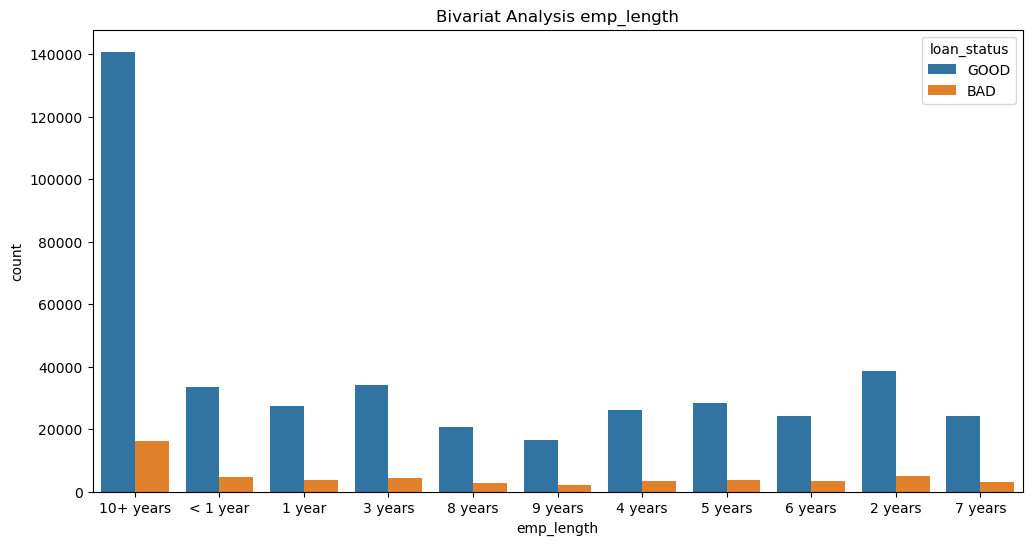

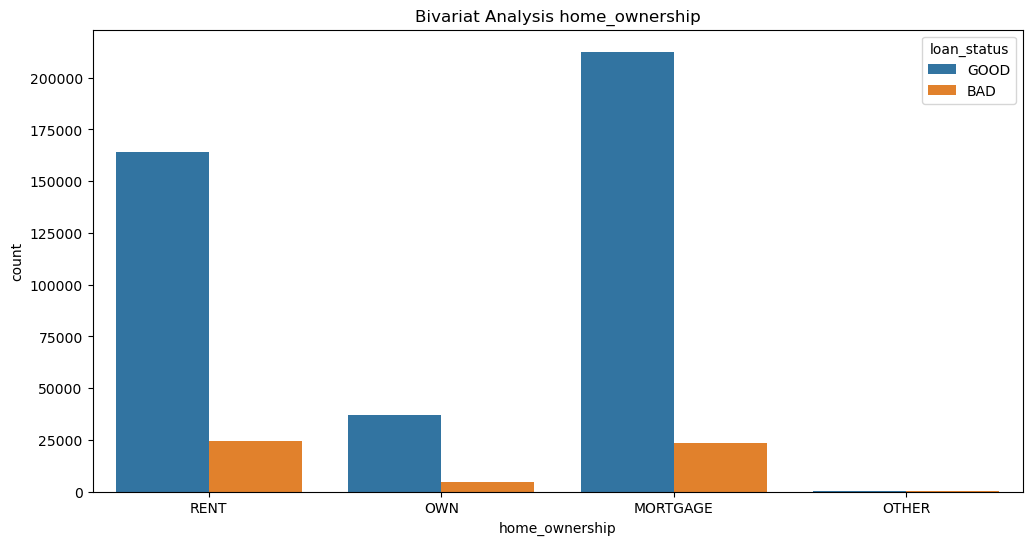

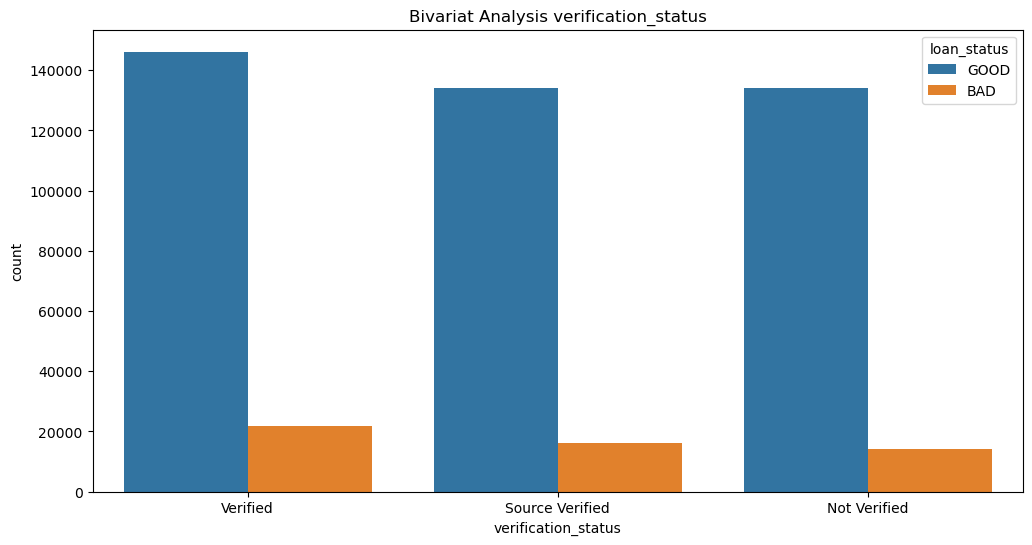

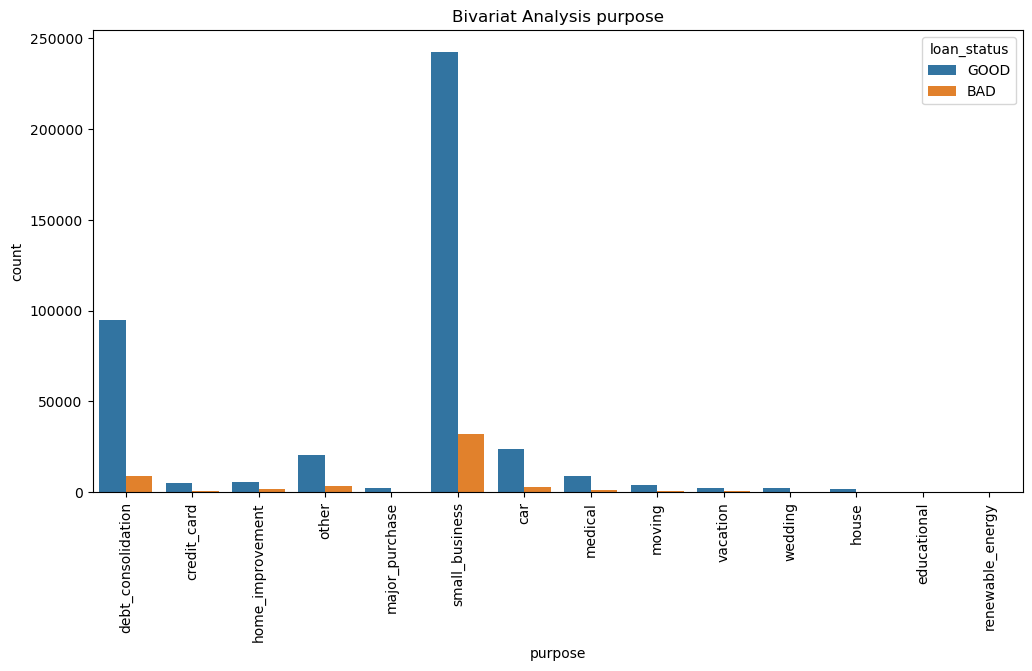

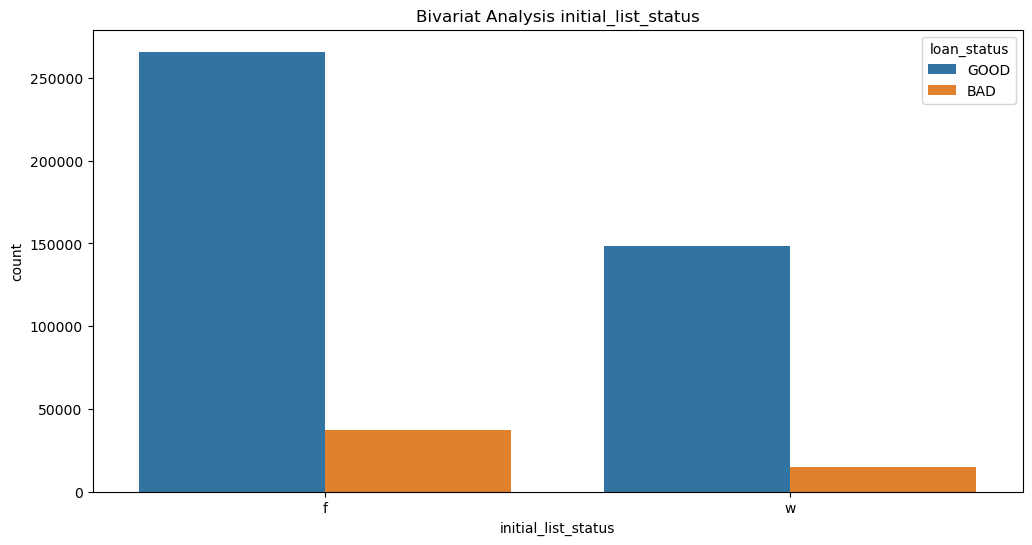

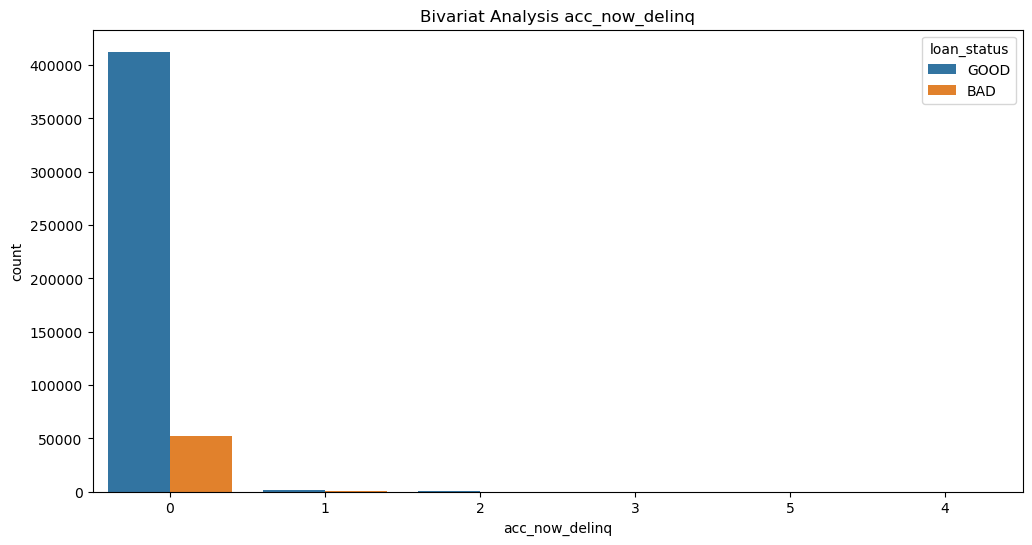

In [39]:
for col in select_column:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=df, x=df[col].sort_values(), hue=df["loan_status"])
for col in select_column:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=df, x=df[col].sort_values(), hue=df["loan_status"])
  if col == "purpose":
    ticks = df[col].value_counts().index
    plt.xticks([i for i in range(len(ticks))], ticks, rotation=90)
  plt.title(f"Bivariat Analysis {col}")
  plt.show()

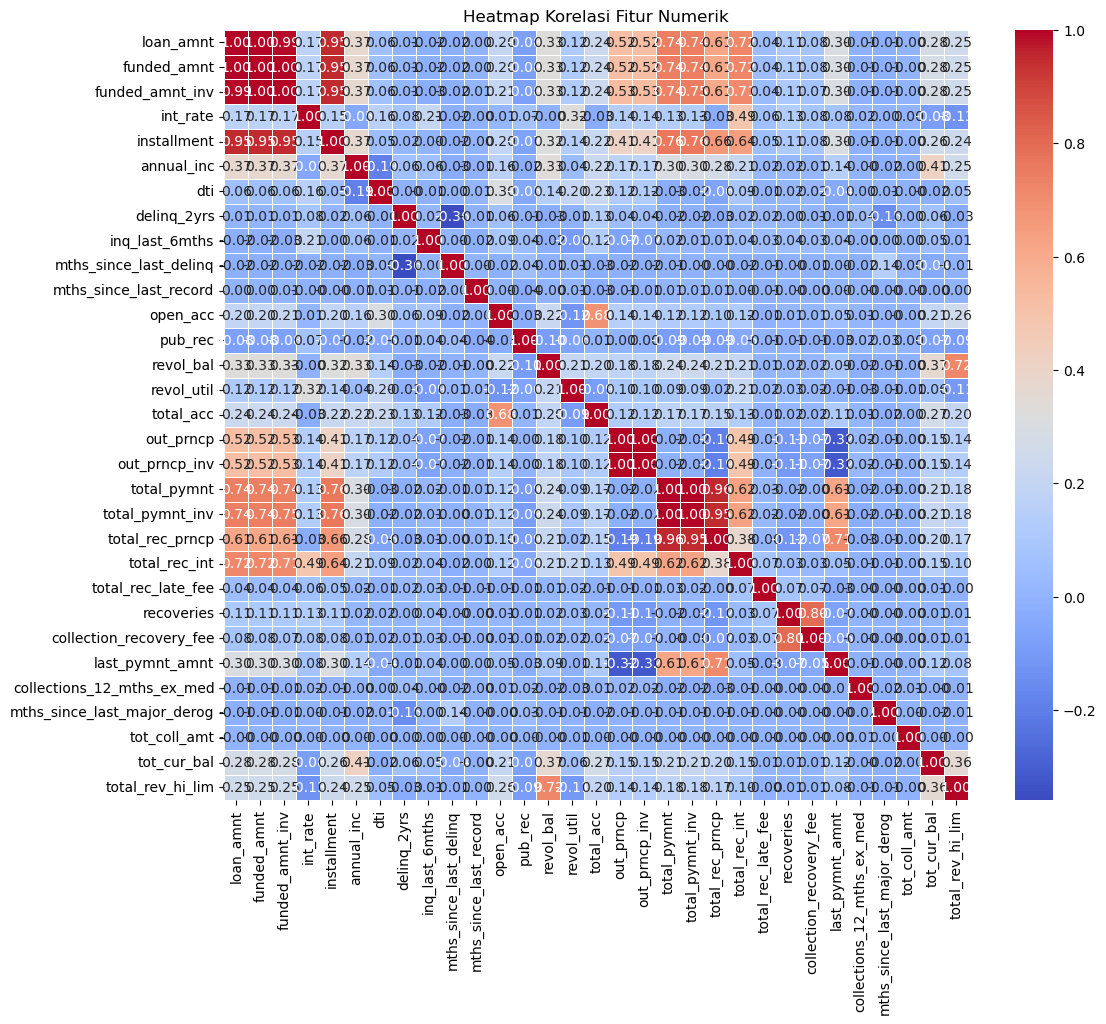

In [40]:
# heatmap korelation untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=["number"])
sns.heatmap(correlation_matrix.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # heatmap korelation
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()  # menampilkan visualisasi

##### Berdasarkan analisis multivariat, dapat dilihat bahwa beberapa fitur memiliki korelasi yang kuat, namun ada beberapa fitur yang tidak memiliki korelasi.

- Sebagian besar kredit macet berasal dari Grade C dan D, dengan masa kerja lebih dari 10 tahun
- Sebagian besar pinjaman digunakan untuk perbaikan rumah dan kartu kredit
- Hampir semua pengguna tidak memiliki akun yang sekarang menjadi tunggakan peminjam

### Data preprocessing

-   Reduce feature dimension with PCA (combine high correlation feature into one)
-   Split data into train & test with ratio 90% train & 10% test
-   Scaling numerical features with StandardScaler / MinMaxScaler
-   Encode categorical features with OneHotEncoder / LabelEncoder
-   Over sample only the train set (preventing data leakage)

In [41]:
high_correlation1 = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment"]
high_correlation2 = ["total_pymnt", "total_pymnt_inv", "total_rec_prncp"]

In [42]:
# Feature engineering PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=42)
df["pca_1"] = pca.fit_transform(df[high_correlation1]).flatten()
df["pca_2"] = pca.fit_transform(df[high_correlation2]).flatten()

In [43]:
df = df.drop(high_correlation1 + high_correlation2, axis=1)

<Axes: xlabel='pca_1', ylabel='pca_2'>

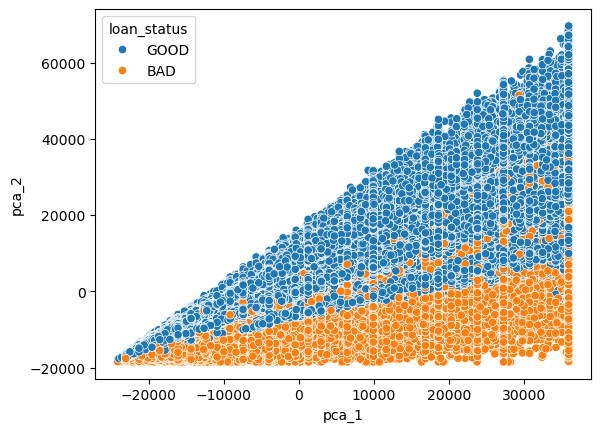

In [44]:
sns.scatterplot(x=df['pca_1'], y=df['pca_2'], hue=df['loan_status'])

- Pembagian data training dan testing

In [45]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"].map({"GOOD" : 1, "BAD" : 0}) # menganti kategorikal menjadi numerical

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
print(f"Jumlah data training: {X_train.shape}")
print(f"Jumlah data testing: {X_test.shape}")

Jumlah data training: (373028, 35)
Jumlah data testing: (93257, 35)


In [48]:
display(y_train.value_counts())
display(y_test.value_counts())

loan_status
1    331279
0     41749
Name: count, dtype: int64

loan_status
1    82820
0    10437
Name: count, dtype: int64

In [49]:
num_cols = X_train.select_dtypes("number").columns
cat_cols = X_train.select_dtypes("object").columns
ohe_cols = [
    "term",
    "home_ownership",
    "verification_status",
    "purpose",
    "initial_list_status",
]

In [50]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

col_trans = ColumnTransformer(
    [
        ("num_pipeline", StandardScaler(), num_cols),
        (
            "ohe_pipeline",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False), # Changed 'sparse' to 'sparse_output'
            ohe_cols,
        ),
    ],
    n_jobs=-1,
)

In [51]:
from sklearn import set_config
set_config(display="diagram")
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline', StandardScaler(),
                                 Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'pca_1', 'pca_2'],
      dtype='object')),
                                ('ohe_pipeline',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['term', 'home_ownership',
                                  'verification_status', 'purpose',
                                  'initial_list_status'])])

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_cols.drop(ohe_cols):
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [53]:
X_train = col_trans.fit_transform(X_train)
X_test = col_trans.transform(X_test)

In [54]:
X_train.shape, X_test.shape

((373028, 51), (93257, 51))

In [55]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import KMeans # Import KMeans
smote = KMeansSMOTE(
    k_neighbors=1000, random_state=42, n_jobs=-1, kmeans_estimator=KMeans()
)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [56]:
X_train.shape, X_train_over.shape

((373028, 51), (662558, 51))

### Modeling

-   Take small sample from the data (25K sample for each class)
-   Perform hyperparameter tuning on LogisticRegression and RandomForestClassifier with Cross Validation on the small sample

In [57]:
np.random.seed(42)
bad_sample = np.random.choice(np.where(y_train_over == 0)[0], 25_000)
good_sample = np.random.choice(np.where(y_train_over == 1)[0], 25_000)

X_train_small = np.concatenate([X_train_over[good_sample], X_train_over[bad_sample]])
y_train_small = np.concatenate([y_train_over[good_sample], y_train_over[bad_sample]])

In [58]:
param_grid = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear", "saga"],
}

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1,
)

In [60]:
best_clf = clf.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [61]:
results = (
    pd.DataFrame(best_clf.cv_results_)
    .sort_values(by="rank_test_score")
    .head()
    .reset_index(drop=True)
)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.464517,0.139533,0.004070,0.002878,545.559478,l2,liblinear,"{'C': 545.5594781168514, 'penalty': 'l2', 'sol...",0.98854,0.98626,0.987219,0.98734,0.000935,1
1,3.686420,0.187995,0.005020,0.000927,3792.690191,l2,liblinear,"{'C': 3792.690190732246, 'penalty': 'l2', 'sol...",0.98860,0.98626,0.987099,0.98732,0.000968,2
2,3.207630,0.951678,0.016066,0.022721,1438.449888,l2,liblinear,"{'C': 1438.44988828766, 'penalty': 'l2', 'solv...",0.98860,0.98620,0.987099,0.98730,0.000990,3
3,2.990299,0.495080,0.006047,0.000109,10000.000000,l2,liblinear,"{'C': 10000.0, 'penalty': 'l2', 'solver': 'lib...",0.98848,0.98626,0.987099,0.98728,0.000915,4
4,2.715100,0.089691,0.006363,0.001242,206.913808,l2,liblinear,"{'C': 206.913808111479, 'penalty': 'l2', 'solv...",0.98836,0.98620,0.987159,0.98724,0.000884,5


In [62]:
best_clf.best_params_

{'C': 545.5594781168514, 'penalty': 'l2', 'solver': 'liblinear'}

In [146]:
param_grid = {
    "n_estimators": [100, 400, 500],
    "ccp_alpha": [5e-5, 1e-5, 1e-3, 0.1, 1],
    "max_depth": [32, 64, 128],
}

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=True,
    n_jobs=-1,
)

In [65]:
best_clf = clf.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


In [66]:
results = (
    pd.DataFrame(best_clf.cv_results_)
    .sort_values(by="rank_test_score")
    .head()
    .reset_index(drop=True)
)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.732033,0.283392,0.294705,0.012693,0.00001,128,100,"{'ccp_alpha': 1e-05, 'max_depth': 128, 'n_esti...",0.98494,0.98368,0.983559,0.98406,0.000624,1
1,17.425383,0.034864,0.336375,0.027965,0.00001,64,100,"{'ccp_alpha': 1e-05, 'max_depth': 64, 'n_estim...",0.98494,0.98368,0.983559,0.98406,0.000624,1
2,16.085695,0.213557,0.319380,0.007282,0.00001,32,100,"{'ccp_alpha': 1e-05, 'max_depth': 32, 'n_estim...",0.98500,0.98368,0.983499,0.98406,0.000669,3
3,80.359287,0.401142,1.509231,0.074483,0.00001,128,500,"{'ccp_alpha': 1e-05, 'max_depth': 128, 'n_esti...",0.98488,0.98314,0.983259,0.98376,0.000794,4
4,81.681414,0.957955,1.424242,0.052037,0.00001,64,500,"{'ccp_alpha': 1e-05, 'max_depth': 64, 'n_estim...",0.98488,0.98314,0.983259,0.98376,0.000794,4


In [150]:
best_clf.best_params_

{'ccp_alpha': 1e-05, 'max_depth': 64, 'n_estimators': 100}

In [152]:
lr_params = {"C": 10000.0, "penalty": "l2", "solver": "liblinear"}
rf_params = {"ccp_alpha": 1e-05, "max_depth": 32, "n_estimators": 100}

In [154]:
from sklearn.model_selection import cross_validate
lr_results = cross_validate(
    LogisticRegression(**lr_params, random_state=42),
    X_train_over,
    y_train_over,
    cv=3,
    n_jobs=-1,
    scoring="f1",
    verbose=1,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.8s finished


In [156]:
rf_results = cross_validate(
    RandomForestClassifier(**rf_params, random_state=42),
    X_train_over,
    y_train_over,
    cv=3,
    n_jobs=-1,
    scoring="f1",
    verbose=1,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.0min finished


In [158]:
print(
    f"Average F1 score on Logistic Regression (Train set): {lr_results['test_score'].mean()}"
)
print(
    f"Average F1 score on Random Forest (Train set): {rf_results['test_score'].mean()}"
)

Average F1 score on Logistic Regression (Train set): 0.9545837933773066
Average F1 score on Random Forest (Train set): 0.9606744970238786


In [160]:
lr = LogisticRegression(**lr_params, random_state=42)
rf = RandomForestClassifier(**rf_params, random_state=42, n_jobs=-1)

In [162]:
def show_all_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(12, 6))
    plt.title("Confusion Matrix Test Set")
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="coolwarm",
        fmt="d",
        xticklabels=["BAD", "GOOD"],
        yticklabels=["BAD", "GOOD"],
        annot_kws={"size": 14},
    )
    plt.show()

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    return {"accuracy": acc, "precision": pre, "recall": rec, "f1_score": f1}

In [164]:
metrics_df = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1_score"])

              precision    recall  f1-score   support

           0       0.99      0.82      0.89     10437
           1       0.98      1.00      0.99     82820

    accuracy                           0.98     93257
   macro avg       0.98      0.91      0.94     93257
weighted avg       0.98      0.98      0.98     93257



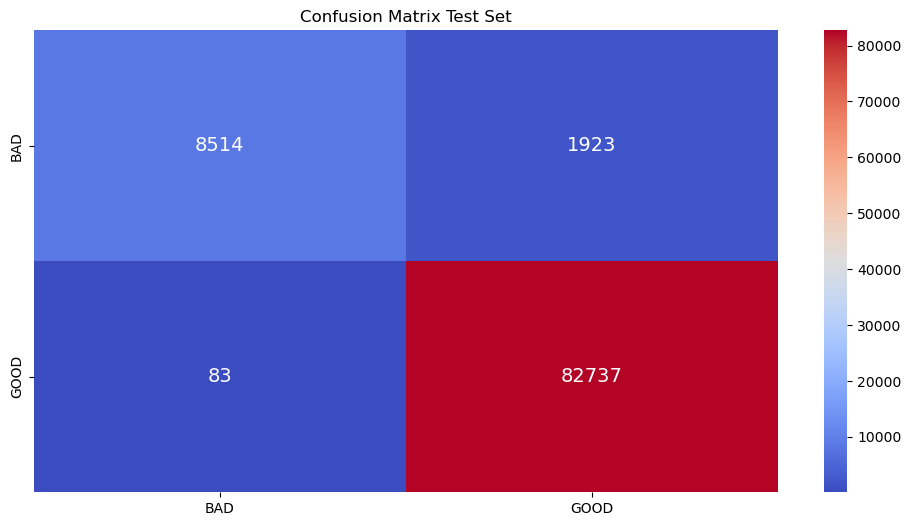

In [166]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics
lr_results_over = show_all_metrics(lr, X_train_over, y_train_over, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     10437
           1       0.98      1.00      0.99     82820

    accuracy                           0.98     93257
   macro avg       0.98      0.91      0.94     93257
weighted avg       0.98      0.98      0.98     93257



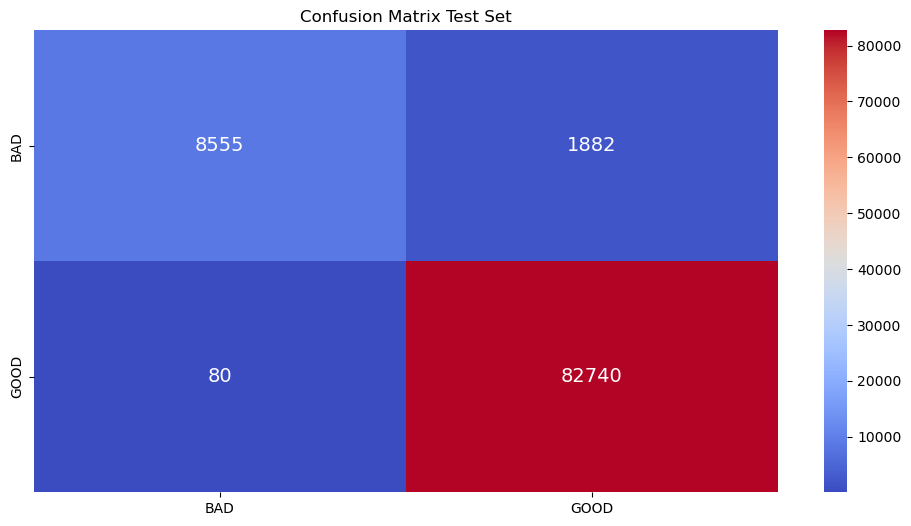

In [168]:
lr_results = show_all_metrics(lr, X_train, y_train, X_test, y_test)

In [170]:
metrics_df.loc["lr_over"] = lr_results_over
metrics_df.loc["lr"] = lr_results

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     10437
           1       0.97      1.00      0.99     82820

    accuracy                           0.98     93257
   macro avg       0.99      0.89      0.93     93257
weighted avg       0.98      0.98      0.97     93257



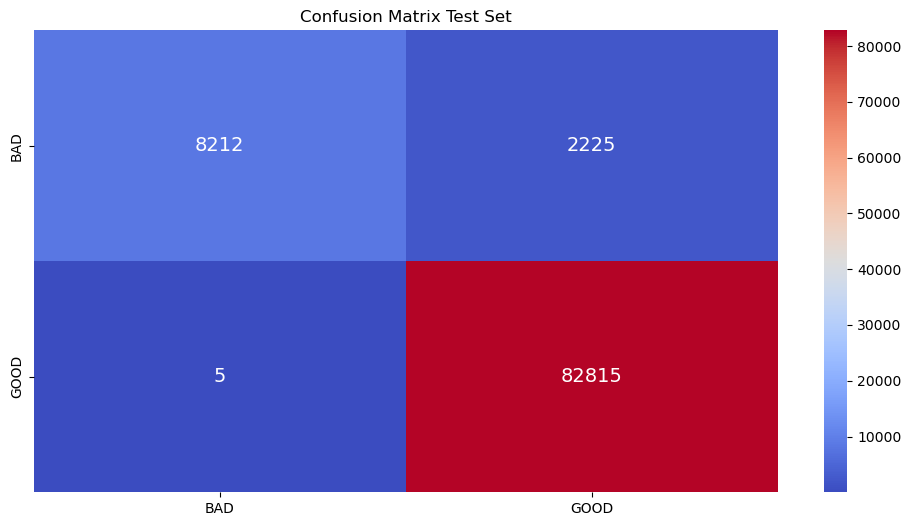

In [172]:
rf_results_over = show_all_metrics(rf, X_train_over, y_train_over, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     10437
           1       0.97      1.00      0.99     82820

    accuracy                           0.98     93257
   macro avg       0.99      0.90      0.94     93257
weighted avg       0.98      0.98      0.98     93257



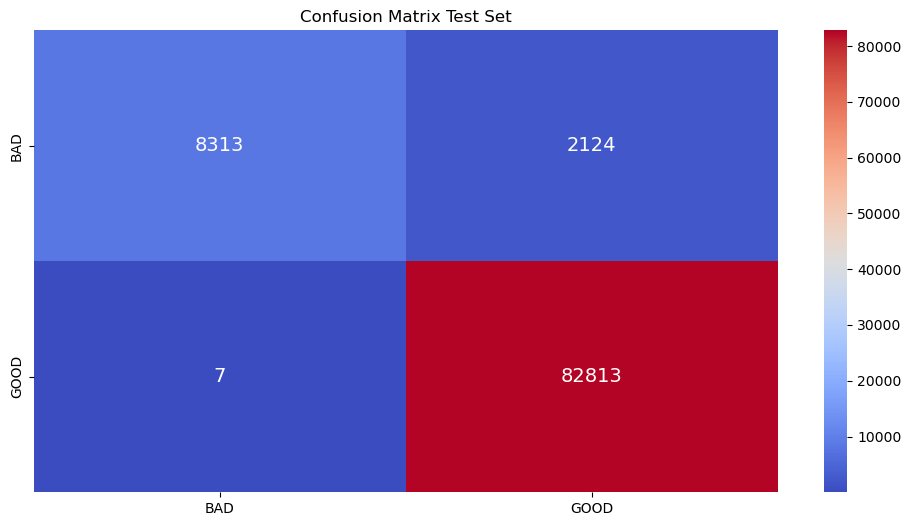

In [174]:
rf_results = show_all_metrics(rf, X_train, y_train, X_test, y_test)

In [176]:
metrics_df.loc["rf_over"] = rf_results_over
metrics_df.loc["rf"] = rf_results

In [178]:
metrics_df

,accuracy,precision,recall,f1_score
lr_over,0.978490,0.983816,0.907375,0.941316
lr,0.978961,0.984248,0.909357,0.942705
rf_over,0.976088,0.986614,0.893378,0.933585
rf,0.977149,0.987076,0.898204,0.936843


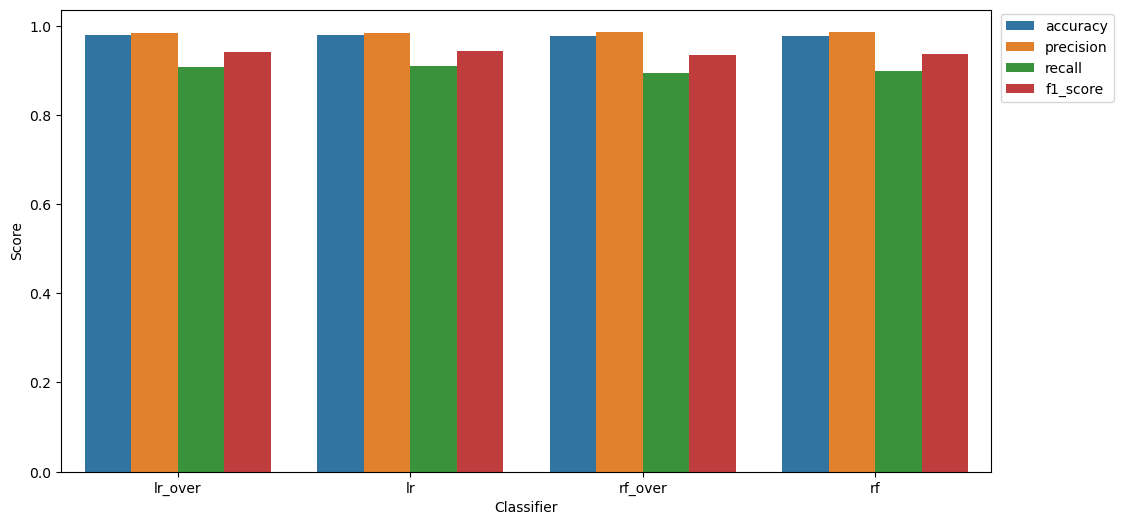

In [180]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=metrics_df.reset_index().melt(
        id_vars="index", var_name="Metric", value_name="Score"
    ),
    x="index",
    y="Score",
    hue="Metric",
)
plt.xlabel("Classifier")
plt.legend(loc=(1.01, 0.8))